In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import seaborn as sns
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil
!{sys.executable} -m pip install split-folders

import splitfolders

import os
from shutil import unpack_archive
from shutil import rmtree
pd.set_option("display.max_columns", 101)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=ac242fba1e4ae293b21f7625f3cb0d38b909677a8b3fe5f346e377b95c711702
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Download dan extract dataset

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ" -O dataset.zip && rm -rf /tmp/cookies.txt

unpack_archive('dataset.zip', '')

os.remove('dataset.zip')

--2023-05-13 05:35:19--  https://docs.google.com/uc?export=download&confirm=t&id=1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ
Resolving docs.google.com (docs.google.com)... 108.177.98.139, 108.177.98.101, 108.177.98.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mbjkljvvuovo7gl5t7hq2nibllkgfdd/1683956100000/11309364930090306574/*/1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ?e=download&uuid=28523f68-67f2-4490-92a0-2f97ca476ae6 [following]
--2023-05-13 05:35:19--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mbjkljvvuovo7gl5t7hq2nibllkgfdd/1683956100000/11309364930090306574/*/1b4DZIS7VfBI_V8-DbpsaCP0ij8u1K3hJ?e=download&uuid=28523f68-67f2-4490-92a0-2f97ca476ae6
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 74.125.135.132, 

In [5]:
# split validation folder to validation and test with ratio 6:4

output = "split-folders"
splitfolders.ratio("validation", output=output, ratio=(.8,.2))

os.chdir('split-folders')
os.rename('train','validation')
os.rename('val','test')

os.chdir('/content')
rmtree('validation')

Copying files: 7066 files [00:01, 6175.69 files/s]


In [6]:
# get label
labels = os.listdir('train')
print(labels)

['angry', 'disgust', 'neutral', 'happy', 'surprise', 'fear', 'sad']


In [7]:
data_labels = []
for label in labels:
    total = len(os.listdir(os.path.join('train', label)))
    detail_labels = [label, total]
    data_labels.append(detail_labels)

print(data_labels)

[['angry', 3993], ['disgust', 436], ['neutral', 4982], ['happy', 7164], ['surprise', 3205], ['fear', 4103], ['sad', 4938]]


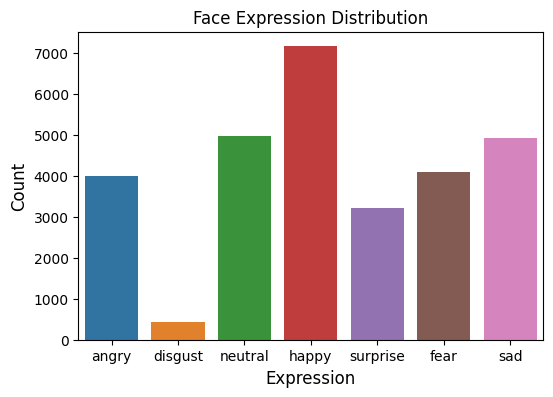

In [8]:
df_labels = pd.DataFrame(data_labels)
df_labels.columns = ['Expression', 'Count']
plt.figure(figsize=(6,4))
sns.barplot(df_labels, x='Expression', y='Count')
plt.title('Face Expression Distribution')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Expression', fontsize=12)
plt.show()

In [10]:
# Total of training data

total_training = 0
total_validation = 0 
total_testing = 0
for label in labels:
    total_train = len(os.listdir(os.path.join('train', label)))
    total_val = len(os.listdir(os.path.join('split-folders/validation', label)))
    total_test = len(os.listdir(os.path.join('split-folders/test', label)))
    total_training += total_train
    total_validation += total_val
    total_testing += total_test

print('the amount of training data is', total_training)
print('the amount of validation data is', total_validation)
print('the amount of testing data is', total_testing)

the amount of training data is 28821
the amount of validation data is 5650
the amount of testing data is 1416


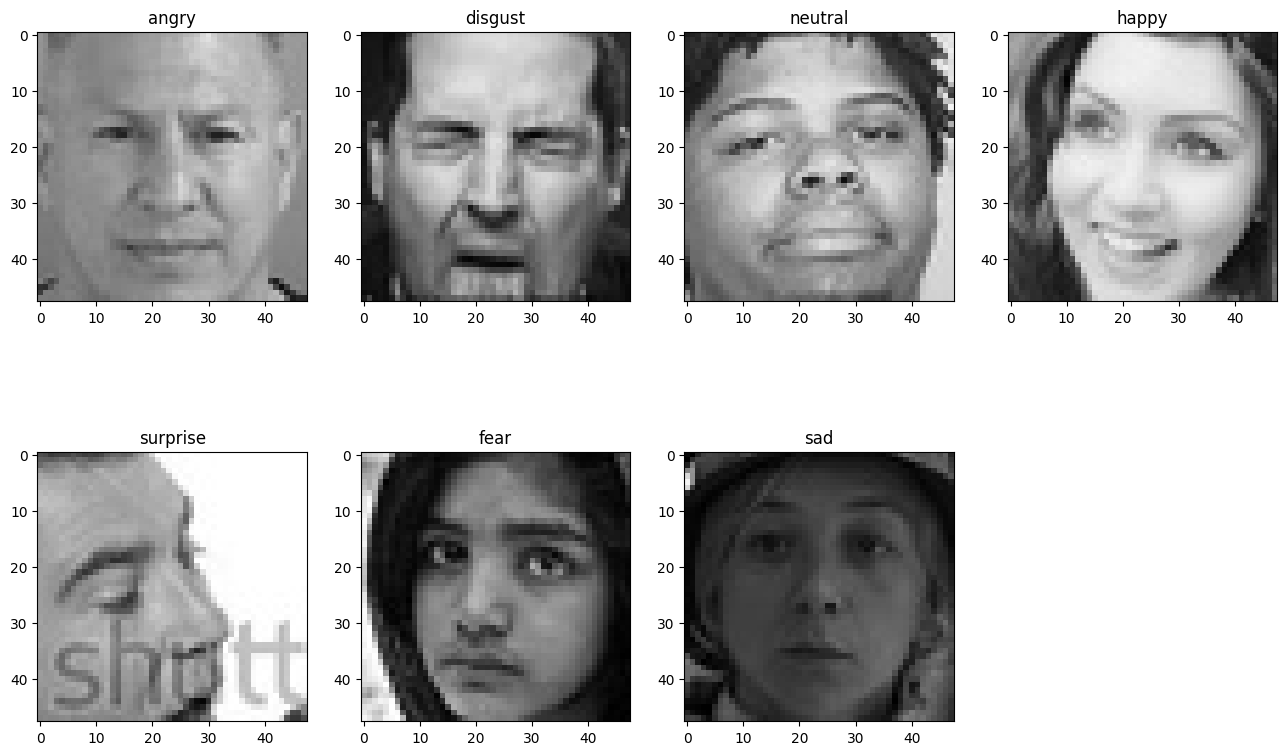

In [11]:
def FaceImage(face_image, expression, path):
    #pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    #img = np.array(pixels.split())
    image_dir = os.path.join(path, expression)
    image_path = os.path.join(image_dir, face_image)
    img = mpimg.imread(image_path)
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), expression], dtype=object)

plt.figure(0, figsize=(16,10))
i = 1;
for label in labels:
    #print(label)
    image_dir = os.path.join('train', label)
    image_list = os.listdir(image_dir)
    face_image = image_list[0]
    img = FaceImage(face_image, label, 'train')
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])
    i+=1

plt.show()  

In [21]:
#initilize parameters
epochs = 10
batch_size = 64

In [13]:
# Image Data Generator
train_datagen = ImageDataGenerator(
      rotation_range = 10,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      zoom_range = 0.1,
      horizontal_flip = True,
      fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator()

In [14]:
# Image Data Preprocess

train_generator = train_datagen.flow_from_directory(
    "train/",
    target_size=(48,48),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = "categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    "split-folders/validation/",
    target_size=(48,48),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = "categorical"
)

Found 28821 images belonging to 7 classes.
Found 5650 images belonging to 7 classes.


In [22]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.ZeroPadding2D((1,1), input_shape=(48,48,1)),
                                    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                    tf.keras.layers.Dropout(0.2),
                                    
                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.ZeroPadding2D((1,1)),
                                    tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                    tf.keras.layers.Dropout(0.2),

                                    # tf.keras.layers.ZeroPadding2D((1,1)),
                                    # tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.Activation('relu'),
                                    # tf.keras.layers.ZeroPadding2D((1,1)),
                                    # tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.Activation('relu'),
                                    # tf.keras.layers.ZeroPadding2D((1,1)),
                                    # tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.Activation('relu'),
                                    # tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                    # tf.keras.layers.Dropout(0.2),

                                    # tf.keras.layers.ZeroPadding2D((1,1)),
                                    # tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.Activation('relu'),
                                    # tf.keras.layers.ZeroPadding2D((1,1)),
                                    # tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.Activation('relu'),
                                    # tf.keras.layers.ZeroPadding2D((1,1)),
                                    # tf.keras.layers.Conv2D(512, (3,3), padding='same'),
                                    # tf.keras.layers.BatchNormalization(),
                                    # tf.keras.layers.Activation('relu'),
                                    # tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
                                    # tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(4096),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(4096),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(2048),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(7, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_24 (ZeroPadd  (None, 50, 50, 1)        0         
 ing2D)                                                          
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 64)        640       
                                                                 
 batch_normalization_30 (Bat  (None, 50, 50, 64)       256       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 50, 50, 64)        0         
                                                                 
 zero_padding2d_25 (ZeroPadd  (None, 52, 52, 64)       0         
 ing2D)                                                          
                                                      

In [23]:
# Compile model

model.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [24]:
# Fit model

history = model.fit(
    train_generator, 
    validation_data = validation_generator,
    epochs=epochs, 
    steps_per_epoch = total_training/batch_size,
    validation_steps = total_validation/batch_size,
    verbose = 1,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
)

Epoch 1/10
450/450 [==============================] - 90s 178ms/step - loss: 1.9823 - accuracy: 0.2261 - val_loss: 1.9225 - val_accuracy: 0.2104
Epoch 2/10
450/450 [==============================] - 78s 174ms/step - loss: 1.9056 - accuracy: 0.2586 - val_loss: 3.0446 - val_accuracy: 0.2450
Epoch 3/10
450/450 [==============================] - 79s 175ms/step - loss: 1.7868 - accuracy: 0.3196 - val_loss: 1.6980 - val_accuracy: 0.3547
Epoch 4/10
450/450 [==============================] - 79s 176ms/step - loss: 1.5895 - accuracy: 0.4151 - val_loss: 1.6288 - val_accuracy: 0.3423
Epoch 5/10
450/450 [==============================] - 79s 174ms/step - loss: 1.4641 - accuracy: 0.4628 - val_loss: 183.4886 - val_accuracy: 0.1126
Epoch 6/10
450/450 [==============================] - 79s 175ms/step - loss: 1.3980 - accuracy: 0.4869 - val_loss: 1.2441 - val_accuracy: 0.5267
Epoch 7/10
450/450 [==============================] - 78s 174ms/step - loss: 1.2983 - accuracy: 0.5117 - val_loss: 1.6294 - val_

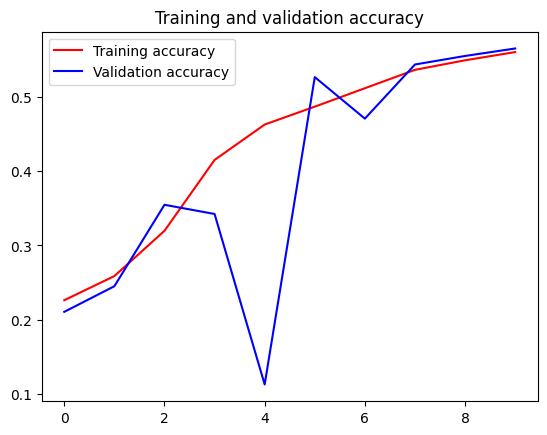

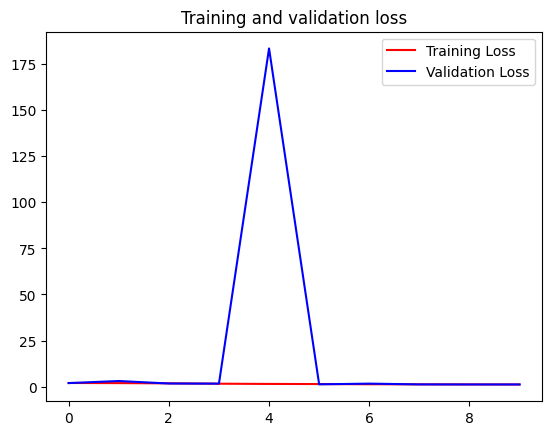

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    "split-folders/test/",
    target_size=(48,48),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = "categorical"
)

accuracy_score = model.evaluate(test_generator)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
print("Loss: ",accuracy_score[0])

Found 1416 images belonging to 7 classes.
23/23 [==============================] - 1s 59ms/step - loss: 1.1654 - accuracy: 0.5530
Accuracy: 55.2966%
Loss:  1.1654281616210938
